In [2]:
import sys
sys.path.append('../ptitprince/')
from collections import namedtuple
Circle = namedtuple("Circle", "x y r")
import pandas as pd
import numpy as np
import scipy as sp
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import time
from matplotlib.lines import Line2D
from math import log10
import math
from scipy.spatial.distance import pdist, squareform
from matplotlib.patches import Patch
import matplotlib.lines as mlines
from matplotlib import colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import os.path
import csv
import gc
import copy
import os

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [3]:
DATA_DIR="/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files"
#robots = [4, 6]
seeds = [4,6]
robots = [2,4,6,10,20,40,60,80,100]

In [4]:
def get_name(n_robot,seed):
    fname = DATA_DIR +'/'+'perf_out_'+str(n_robot)+'_'+str(seed)+'.txt'
    print(fname)
    return fname

In [5]:
def get_names_f(n_r):
    n = ['time','seed','no_of_robots']

    for k in range(0,n_r):
        n.append('id:'+str(k))
        n.append('collision_'+str(k))
        n.append('state_'+str(k))
        n.append('estimate_'+str(k))
    
    n.append('exp_finished')
    return n

Total collision per robot in the whole experiment, time_taken and estimate average. 

In [22]:
total_collision = pd.DataFrame()
total_time = pd.DataFrame()

for robot in robots:
    for seed in seeds: 
        fname = get_name(robot,seed)
        perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
        df = pd.DataFrame(data=perf_frame)
        collision_sum = pd.DataFrame() 
        time_ = pd.DataFrame()
        # print(df)
        
        collision = df.filter(regex='collision').tail(1).reset_index(drop=True)
        collision_sum['exp_finished']  = df['exp_finished'].tail(1).reset_index(drop=True)
        collision_sum['collision_sum'] = collision.sum(axis='columns')/(robot*10)
        collision_sum['number_of_robots'] = robot
        collision_sum['seed'] = seed

        time_= df['exp_finished'].tail(1).reset_index()
        time_.rename(columns={'index':'time'}, inplace=True)
        time_['time'] = time_['time']/10
        time_['number_of_robots'] = robot
        time_['seed'] = seed


        total_collision = pd.concat([total_collision,collision_sum], ignore_index=True)    
        total_time = pd.concat([total_time,time_], ignore_index=True) 



# print(perf_frame)

#total collisions for experiment 
# print(perf_frame[)
print(total_collision)
print(total_time)


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_2_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_4_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_4_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_6_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_6_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_10_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_10_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_20_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_20_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepe

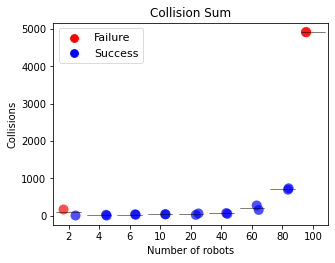

In [23]:
dx="number_of_robots"
dy="collision_sum"
dhue="exp_finished"
pal=["red","blue"]
data = total_collision

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Collision Sum")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Failure','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Collisions",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

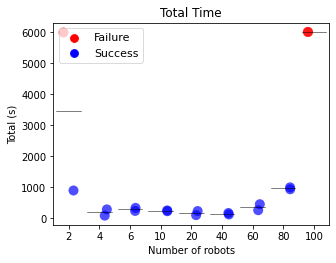

In [24]:
dx="number_of_robots"
dy="time"
dhue="exp_finished"
pal=["red","blue"]
data = total_time

f, ax = plt.subplots(figsize=(4.5,3.5))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time")


sns.stripplot(x=dx, 
              y=dy,  
              hue=dhue,
              data=data,
              ax=ax,
              alpha=0.69,
              jitter=0.1,
              palette=pal,
              dodge=True,
              size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.5},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x=dx,
            y=dy,
            data=data,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], ['Failure','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

Per State analysis for time and collisions

In [28]:
total_state_collision = pd.DataFrame()
total_state_time = pd.DataFrame()

for robot in robots:
    for seed in seeds: 

        fname = get_name(robot,seed)
        perf_frame = pd.read_csv(fname, sep=',', names=get_names_f(robot))
        df = pd.DataFrame(data=perf_frame)
        collision_state = pd.DataFrame() 
        time_per_state = pd.DataFrame()

        state = df.filter(regex='state')
        collision = df.filter(regex='collision').diff()

        state = state.melt(var_name='columns', value_name='index')
        collision = collision.melt(var_name='col_collision', value_name='ind_collision')
        collision_state = pd.concat([state,collision], axis = 1)
        collision_state.drop(collision_state.index[collision_state['ind_collision'] == 0], inplace = True)
        collision_state = collision_state.filter(regex=r'index|columns').reset_index(drop=True)


        state = pd.crosstab(index=state['index'], columns=state['columns'])
        collision_state = pd.crosstab(index=collision_state['index'], columns=collision_state['columns'])
        state["sum"] = state.sum(axis=1)/(robot*10)
        collision_state["sum"] = collision_state.sum(axis=1)/(robot*10)

        state = state.drop(state.columns[0:state.shape[1]-1], axis=1)
        collision_state = collision_state.drop(collision_state.columns[0:collision_state.shape[1]-1], axis=1)

        state['state'] = state.index 
        collision_state['state'] = collision_state.index

        state['seed'] = [seed]*state.shape[0]
        state['number_of_robots'] = [robot]*state.shape[0]
        collision_state['seed'] = [seed]*collision_state.shape[0]
        collision_state['number_of_robots'] = [robot]*collision_state.shape[0]

        total_state_time = pd.concat([total_state_time,state])
        total_state_collision = pd.concat([total_state_collision,collision_state])



total_state_time.sort_values(by=['state'], inplace=True)
total_state_collision.sort_values(by=['state'], inplace=True)

total_state_time_black = total_state_time.filter(regex='black',axis=0)
total_state_collision_black = total_state_collision.filter(regex='black',axis=0)
total_state_time_white = total_state_time.filter(regex='white',axis=0)
total_state_collision_white = total_state_collision.filter(regex='white',axis=0)


/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_2_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_2_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_4_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_4_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_6_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_6_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_10_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_10_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_20_4.txt
/home/somz/Projects/Hierarchies_to_scale/khepera-simulations/files/data_files/perf_out_20_6.txt
/home/somz/Projects/Hierarchies_to_scale/khepe

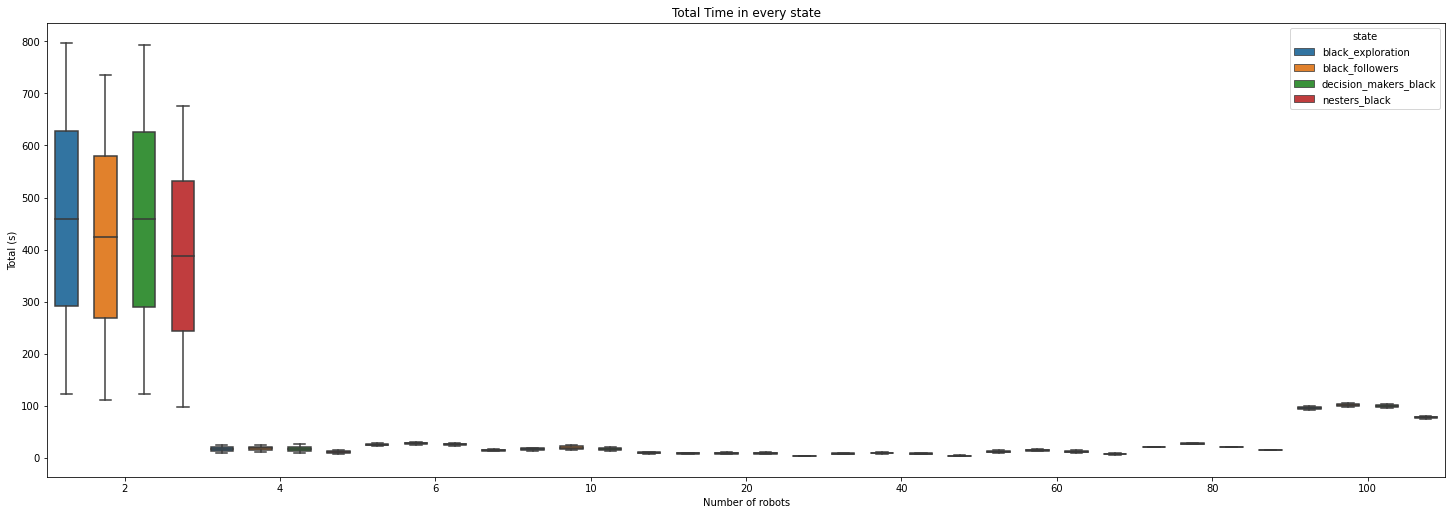

In [43]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_time_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

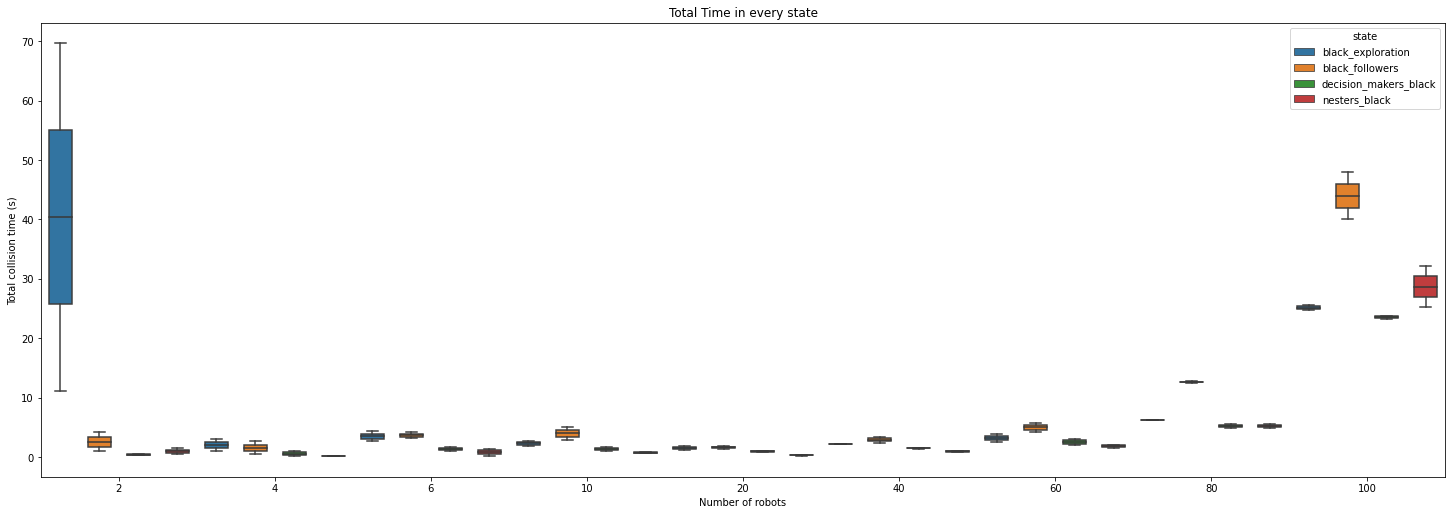

In [29]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_black

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()

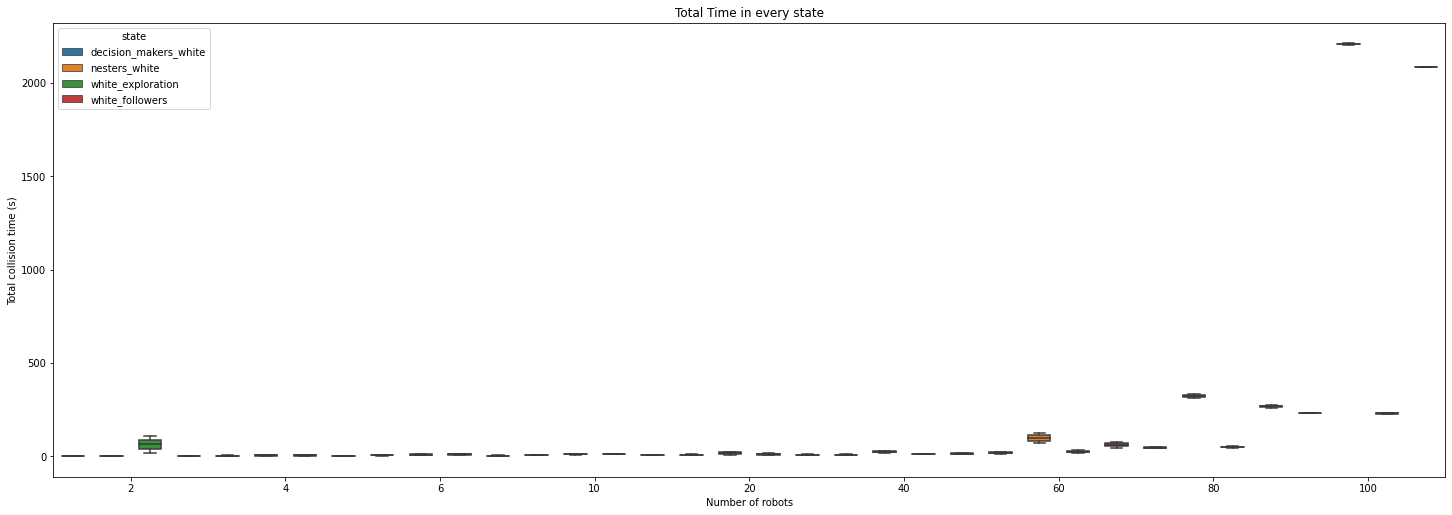

In [30]:
dx="number_of_robots"
dy="sum"
dhue="state"
pal=["red","blue","green","orange","yellow","black","pink","purple"]
data = total_state_collision_white

f, ax = plt.subplots(figsize=(20,7))
# ax.set_yticks([i for i in range(0,30000,2000)])

plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 

plt.title("Total Time in every state spent avoiding collisions")




# sns.stripplot(x=dx, 
#               y=dy,  
#               hue=dhue,
#               data=data,
#               ax=ax,
#               alpha=0.69,
#               jitter=0.1,
#               palette=pal,
#               dodge=True,
#               size=10)

sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 0.1},
            medianprops={'visible': True},
            whiskerprops={'visible': True},
            zorder=50,
            x=dx,
            y=dy,
            hue=dhue,
            data=data,
            showfliers=True,
            showbox=True,
            showcaps=True,
            width=1,
            ax=ax)

# ax.get_legend().remove()
# ax.legend(loc=3,ncol=3,framealpha=0.5,fontsize=11)
# handles, labels = ax.get_legend_handles_labels()
# l = plt.legend(handles[0:9], ['black_follower','Success'],loc="upper left",framealpha=0.7,fontsize=11)

# plt.xticks([0,5,10,15], ['15X15','30X30', '60X60', '120X120'])
# plt.ylim(-0.05,1.4)

# plt.yticks(np.arange(0.0,1.45,0.2))
plt.tight_layout(pad=0.1)
# plt.figtext(0.12, 0.8, ' 30X30m Arena',  color='black', weight='roman',size='medium',fontsize=16)
ax.set_ylabel("Total collision time (s)",fontsize=10)
ax.set_xlabel("Number of robots",fontsize=10)
# plt.savefig("/home/somz/connectivity/papers/2022/Topology_manipulation/ICRA_Topology_Manipulation/ieeeconf/figures/Time_taken_line.pdf", dpi=600, format="pdf", transparent=False)
plt.show()
        